# ANN Model 

In [ ]:
%pip install tensorflow

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

### Loading Features

In [4]:
# Load features and labels
features = np.load('../feature_extraction_smooth/image_features.npy')    # shape: (num_images, 500)
labels = np.load('../feature_extraction_smooth/image_labels.npy')        # shape: (num_images,)

# Normalize the features with StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Assuming labels are integers from 0 to (num_categories-1).
num_classes = len(np.unique(labels))

# Convert labels to one-hot encoding
labels_categorical = to_categorical(labels, num_classes=num_classes)

In [ ]:
# Spliting into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(features, labels_categorical, test_size=0.2, stratify=labels, random_state=42)

### Model Definition, Training and Evaluation

In [ ]:
# ANN model
ann_model = Sequential([
    Dense(1024, activation='relu', input_shape=(500,)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)
ann_model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

# Defining callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ModelCheckpoint("best_ann_model_2.h5", monitor='val_accuracy', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1)
]

# Training
history = ann_model.fit(X_train, y_train, 
                        validation_data=(X_test, y_test),
                        epochs=100, 
                        batch_size=64, 
                        callbacks=callbacks, 
                        verbose=1)

# Loading the best weights and evaluating
ann_model.load_weights('best_ann_model_2.h5')
ann_accuracy = ann_model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Final ANN Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final ANN Test Accuracy: {ann_accuracy:.4f}")

/home/sahil-narkhede/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-08 19:47:32.653390: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3672 - loss: 2.4772

15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.3747 - loss: 2.4399 - val_accuracy: 0.4208 - val_loss: 1.8488 - learning_rate: 0.0010
Epoch 2/100
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7741 - loss: 0.6746

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7789 - loss: 0.6698 - val_accuracy: 0.4292 - val_loss: 1.9408 - learning_rate: 0.0010
Epoch 3/100
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8836 - loss: 0.3763

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8837 - loss: 0.3737 - val_accuracy: 0.5250 - val_loss: 1.4559 - learning_rate: 0.0010
Epoch 4/100
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9215 - loss: 0.2658

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9212 - loss: 0.2664 - val_accuracy: 0.5792 - val_loss: 1.3021 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9631 - loss: 0.1484

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9630 - loss: 0.1482 - val_accuracy: 0.6583 - val_loss: 1.0005 - learning_rate: 0.0010
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9870 - loss: 0.0826

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9865 - loss: 0.0836 - val_accuracy: 0.7125 - val_loss: 0.9001 - learning_rate: 0.0010
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9828 - loss: 0.0730

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9824 - loss: 0.0737 - val_accuracy: 0.7208 - val_loss: 0.8152 - learning_rate: 0.0010
Epoch 8/100
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9886 - loss: 0.0571

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9887 - loss: 0.0570 - val_accuracy: 0.7708 - val_loss: 0.7413 - learning_rate: 0.0010
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9949 - loss: 0.0419 - val_accuracy: 0.7667 - val_loss: 0.7479 - learning_rate: 0.0010
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9964 - loss: 0.0373 - val_accuracy: 0.7708 - val_loss: 0.7297 - learning_rate: 0.0010
Epoch 11/100
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9940 - loss: 0.0278

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9941 - loss: 0.0281 - val_accuracy: 0.7917 - val_loss: 0.7170 - learning_rate: 0.0010
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9990 - loss: 0.0212 - val_accuracy: 0.7750 - val_loss: 0.7619 - learning_rate: 0.0010
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9966 - loss: 0.0244 - val_accuracy: 0.7833 - val_loss: 0.7607 - learning_rate: 0.0010
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9991 - loss: 0.0149 - val_accuracy: 0.7917 - val_loss: 0.7282 - learning_rate: 0.0010
Epoch 15/100
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9989 - loss: 0.0165


Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9988 - loss: 0.0167 - val_accuracy: 0.8042 - val_loss: 0.7569 - learning_rate: 0.0010
Epoch 16/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9989 - loss: 0.0149 - val_accuracy: 0.8042 - val_loss: 0.7719 - learning_rate: 5.0000e-04
Epoch 17/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9987 - loss: 0.0088 - val_accuracy: 0.8000 - val_loss: 0.7911 - learning_rate: 5.0000e-04
Epoch 18/100
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9958 - loss: 0.0116

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9962 - loss: 0.0116 - val_accuracy: 0.8167 - val_loss: 0.7691 - learning_rate: 5.0000e-04
Epoch 19/100
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9991 - loss: 0.0089
Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9991 - loss: 0.0092 - val_accuracy: 0.8083 - val_loss: 0.7521 - learning_rate: 5.0000e-04
Final ANN Training Accuracy: 0.9990
Final ANN Test Accuracy: 0.8167


### Robust ANN model + Early Stoppage + L2 Normalization at each layer

In [7]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
# RObust ANN architecture with adjustments to reduce overfitting
ann_model = Sequential([
    Dense(768, kernel_regularizer=l2(0.001), input_shape=(500,)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    Dense(512, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),

    Dense(256, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

# Compiling with a lower learning rate
ann_model.compile(optimizer=Adam(learning_rate=0.0005), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

# callbacks with adjusted early stopping
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint("best_ann_model_3.h5", monitor='val_accuracy', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

# training
history = ann_model.fit(X_train, y_train, 
                        validation_data=(X_test, y_test),
                        epochs=100, 
                        batch_size=64, 
                        callbacks=callbacks, 
                        verbose=1)

# loading the best weights and evaluate=ing
ann_model.load_weights('best_ann_model_3.h5')
ann_accuracy = ann_model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Final ANN Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final ANN Test Accuracy: {ann_accuracy:.4f}")

/home/sahil-narkhede/anaconda3/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1280 - loss: 4.6487

15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.1361 - loss: 4.6064 - val_accuracy: 0.4000 - val_loss: 3.4716 - learning_rate: 5.0000e-04
Epoch 2/100
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3856 - loss: 3.5134

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.3877 - loss: 3.5087 - val_accuracy: 0.4333 - val_loss: 3.3030 - learning_rate: 5.0000e-04
Epoch 3/100
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5067 - loss: 3.1875

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5096 - loss: 3.1772 - val_accuracy: 0.5083 - val_loss: 3.1008 - learning_rate: 5.0000e-04
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5576 - loss: 2.9648 - val_accuracy: 0.5083 - val_loss: 3.0117 - learning_rate: 5.0000e-04
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6220 - loss: 2.7231

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6226 - loss: 2.7219 - val_accuracy: 0.5667 - val_loss: 2.8643 - learning_rate: 5.0000e-04
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6930 - loss: 2.5508

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6927 - loss: 2.5503 - val_accuracy: 0.6125 - val_loss: 2.7317 - learning_rate: 5.0000e-04
Epoch 7/100
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7433 - loss: 2.4761

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7421 - loss: 2.4734 - val_accuracy: 0.6292 - val_loss: 2.6455 - learning_rate: 5.0000e-04
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7467 - loss: 2.3627

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7475 - loss: 2.3620 - val_accuracy: 0.6542 - val_loss: 2.5214 - learning_rate: 5.0000e-04
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7534 - loss: 2.2913

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7545 - loss: 2.2894 - val_accuracy: 0.7333 - val_loss: 2.4054 - learning_rate: 5.0000e-04
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8017 - loss: 2.1919

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8011 - loss: 2.1933 - val_accuracy: 0.7375 - val_loss: 2.3639 - learning_rate: 5.0000e-04
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8129 - loss: 2.1044

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8135 - loss: 2.1046 - val_accuracy: 0.7500 - val_loss: 2.2977 - learning_rate: 5.0000e-04
Epoch 12/100
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8200 - loss: 2.0898

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.8205 - loss: 2.0888 - val_accuracy: 0.7708 - val_loss: 2.2570 - learning_rate: 5.0000e-04
Epoch 13/100
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8642 - loss: 1.9569

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8632 - loss: 1.9605 - val_accuracy: 0.7917 - val_loss: 2.1958 - learning_rate: 5.0000e-04
Epoch 14/100
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8618 - loss: 1.9535

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8632 - loss: 1.9494 - val_accuracy: 0.7958 - val_loss: 2.1686 - learning_rate: 5.0000e-04
Epoch 15/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8634 - loss: 1.9109 - val_accuracy: 0.7833 - val_loss: 2.1628 - learning_rate: 5.0000e-04
Epoch 16/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9044 - loss: 1.8205 - val_accuracy: 0.7750 - val_loss: 2.1291 - learning_rate: 5.0000e-04
Epoch 17/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9069 - loss: 1.7918 - val_accuracy: 0.7792 - val_loss: 2.1272 - learning_rate: 5.0000e-04
Epoch 18/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9212 - loss: 1.7392 - val_accuracy: 0.7750 - val_loss: 2.0933 - learning_rate: 5.0000e-04
Epoch 19/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9192 - loss: 1.7204 - val_accuracy: 0.7792 - val_loss: 2.1044 - learning_rate: 5.0000e-04
Epoch 20/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9329

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9922 - loss: 1.2320 - val_accuracy: 0.8000 - val_loss: 1.8569 - learning_rate: 2.5000e-04
Epoch 47/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9900 - loss: 1.2223 - val_accuracy: 0.7667 - val_loss: 1.8516 - learning_rate: 2.5000e-04
Epoch 48/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9946 - loss: 1.2151 - val_accuracy: 0.7708 - val_loss: 1.8753 - learning_rate: 2.5000e-04
Epoch 49/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9924 - loss: 1.1987 - val_accuracy: 0.7625 - val_loss: 1.8619 - learning_rate: 2.5000e-04
Epoch 50/100
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9916 - loss: 1.1970
Epoch 50: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9918 - loss: 1.1960 - val_accuracy: 0.7750 - val_loss: 1.8734 - learning_rate: 2.5000e-04
Epoch 51/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9936 - los

### ANN Confusion Matrix 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


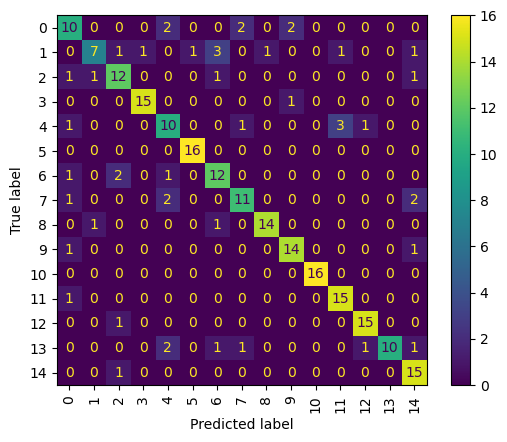

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the class probabilities for the test set
y_pred_probs = ann_model.predict(X_test)

# Convert probabilities to class predictions
y_pred_classes = y_pred_probs.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

# Generating the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(num_classes))
disp.plot(cmap='viridis', xticks_rotation='vertical')